2-element Vector{Float64}:
 79.47075208913648
  9.777158774373248

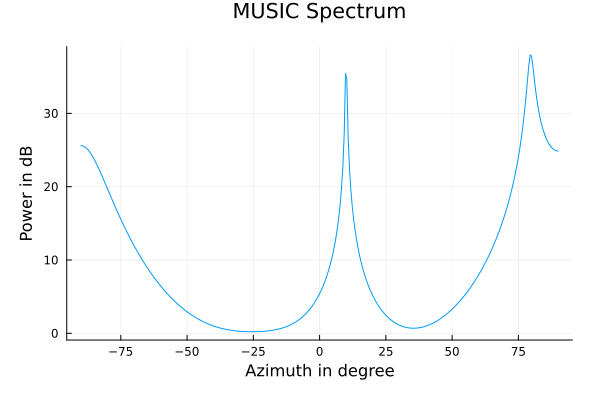

In [38]:
using ArraySignalProcessing
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Rss = I(2)
Θ = deg2rad.([10, 80])
d = length(Θ)
N = 2000
SNR = 5
X = unconditional_signals(pa, Rss, N, SNR, Θ, fc)
Rxx = X*X'/N

# MUSIC spectrum
ϕaxis = LinRange(-90, 90, 360)
P = music(pa, Rxx, d, deg2rad.(ϕaxis), fc)
display(find_doas(ϕaxis, P, d))
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")

2-element Vector{Float64}:
 80.47353760445682
 10.278551532033433

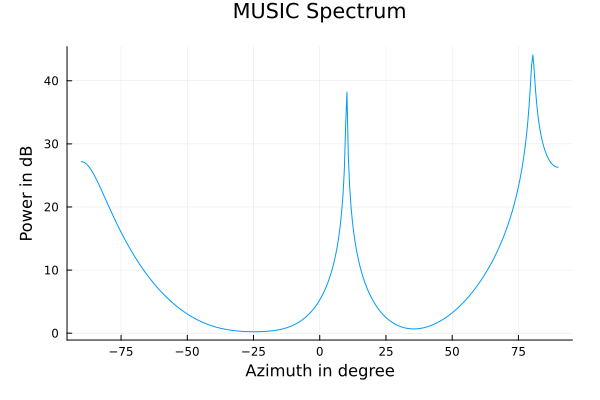

In [39]:
using  CUDA
pa = IsotropicArray(cu([0 0 0 0;
                    -1.5 -0.5 0.5 1.5]))

X = unconditional_signals(pa, cu(Rss), N, SNR, cu(Θ), fc)
Rxx = cu(Hermitian(Array(X*X'/N)))

P = music(pa, cu(Rxx), d, cu(deg2rad.(ϕaxis)), fc)
display(find_doas(ϕaxis, Array(P), d))

using Plots
import Measures
p1 = plot(ϕaxis, Array(10*log10.(P)))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")